# What the F is this about?

This is the simplest siamese network to be in existence.
It compares if two numbers are of same sign.


If they are of same signs (+, +) or (-, -), it will give you high score.

Else low.
## References
https://colab.research.google.com/drive/1FsixLon5Zz3_rFA0xIHzc8Tvnnw8FLr8#scrollTo=6aUJOhkrFfu9

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,25)

In [3]:
import torch
import torch.utils.data as utils
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
from torch.autograd import Variable

In [4]:
import torch.nn as nn

# Number Pair Dataset

In [5]:
import random

In [6]:
class SiameseNetworkSimplestDataset(Dataset):
    def __init__(self, minval=-100, maxval=100, npairs=1000):
        self.minval = minval
        self.maxval = maxval
        self.data = []

        # positive pairs
        for i in range(npairs//2):
            num1 = random.randint(1, self.maxval)
            num2 = random.randint(1, self.maxval)
            self.data.append((num1, num2, 1))
        for i in range(npairs//2):
            num1 = random.randint(self.minval, -1)
            num2 = random.randint(self.minval, -1)
            self.data.append((num1, num2, 1))

        # negative pairs
        for i in range(npairs//2):
            num1 = random.randint(1, self.maxval)
            num2 = random.randint(self.minval, -1)
            self.data.append((num1, num2, 0))
        for i in range(npairs//2):
            num1 = random.randint(1, self.maxval)
            num2 = random.randint(self.minval, -1)
            self.data.append((num2, num1, 0))

        random.shuffle(self.data)
        self.data = list(map(lambda x: (np.array([x[0]], dtype=np.float32), np.array([x[1]], dtype=np.float32), x[2]), self.data))

    @property
    def npairs(self):
        return len(self.data)

    def __len__(self):
        return self.npairs

    def __getitem__(self, index):
        return self.data[index]

In [7]:
simplest_dataset = SiameseNetworkSimplestDataset(npairs=1000)

In [8]:
simplest_dataset[5]

(array([-90.], dtype=float32), array([61.], dtype=float32), 0)

In [9]:
simplest_dataset[:6]

[(array([57.], dtype=float32), array([-51.], dtype=float32), 0),
 (array([60.], dtype=float32), array([53.], dtype=float32), 1),
 (array([-59.], dtype=float32), array([-74.], dtype=float32), 1),
 (array([-89.], dtype=float32), array([-97.], dtype=float32), 1),
 (array([-53.], dtype=float32), array([-29.], dtype=float32), 1),
 (array([-90.], dtype=float32), array([61.], dtype=float32), 0)]

In [10]:
simplest_dataloader = DataLoader(simplest_dataset, shuffle=True, batch_size=4)

# ANN Siamese Network

In [11]:
class SiameseNetwork(torch.nn.Module):
    def __init__(self, input_dim=2):
        super(SiameseNetwork, self).__init__()
             # Defining the fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU(inplace=True),

            # nn.Linear(4, 8),
            # nn.ReLU(inplace=True),

            # nn.Linear(8, 4),
            # nn.ReLU(inplace=True),

            nn.Linear(4, 3)
        )

    def forward_once(self, x):
        return self.fc1(x)

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

In [12]:
model = SiameseNetwork()

In [13]:
# torch.Tensor(1)

In [14]:
# model.forward_once(torch.Tensor(1))

# Training

In [15]:
# Load the dataset as pytorch tensors using dataloader
train_dataloader = DataLoader(simplest_dataset,
                        shuffle=True,
                        num_workers=4,
                        batch_size=16)

In [16]:
# GPU availability
torch.cuda.is_available()

False

In [17]:
# Declare Siamese Network
net = SiameseNetwork()
# Decalre Loss Function
criterion = nn.CosineEmbeddingLoss()
# criterion = nn.CosineSimilarity()
# Declare Optimizer
optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-4, alpha=0.99, eps=1e-8, weight_decay=0.0005, momentum=0.9)

In [18]:
counter = []
loss_history = [] 
iteration_number= 0
epochs = 50
for epoch in range(0, epochs):
    for i, data in enumerate(train_dataloader, 0):
        num1, num2, label = data
        optimizer.zero_grad()
        output1, output2 = net(num1, num2)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %100 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

Epoch number 0
 Current loss 0.006015501916408539

Epoch number 0
 Current loss 0.00015624240040779114

Epoch number 1
 Current loss 2.5190412998199463e-05

Epoch number 1
 Current loss 2.6639550924301147e-05

Epoch number 2
 Current loss 4.374608397483826e-05

Epoch number 2
 Current loss 2.7976930141448975e-06

Epoch number 3
 Current loss 2.823770046234131e-06

Epoch number 3
 Current loss -2.2351741790771484e-08

Epoch number 4
 Current loss 1.1175870895385742e-08

Epoch number 4
 Current loss -1.1175870895385742e-08

Epoch number 5
 Current loss 1.4901161193847656e-08

Epoch number 5
 Current loss 7.450580596923828e-09

Epoch number 6
 Current loss 0.0

Epoch number 6
 Current loss 1.4901161193847656e-08

Epoch number 7
 Current loss 5.587935447692871e-08

Epoch number 7
 Current loss 8.754432201385498e-07

Epoch number 8
 Current loss 1.6763806343078613e-07

Epoch number 8
 Current loss 1.0803341865539551e-07

Epoch number 9
 Current loss 1.1920928955078125e-07

Epoch number 9
 C

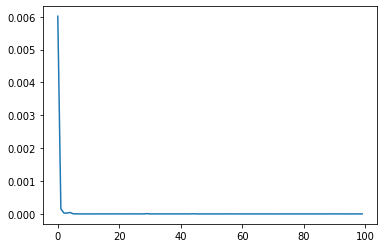

In [20]:
plt.plot(loss_history)

# Test

We get the embedding for each input number and compare their similarity using cosine similarity metric.

In [21]:
# both negative -> score should be high
num1 = np.array([-1], dtype=np.float32)
num2 = np.array([-1], dtype=np.float32)
num1 = torch.from_numpy(num1)
num2 = torch.from_numpy(num2)

out1, out2 = net(num1, num2)
print(out1, out2)
nn.CosineSimilarity(dim=0)(out1, out2)

tensor([ 0.0210,  0.0104, -0.0074], grad_fn=<AddBackward0>) tensor([ 0.0210,  0.0104, -0.0074], grad_fn=<AddBackward0>)


tensor(1., grad_fn=<DivBackward0>)

In [22]:
# -ve, +ve
num1 = np.array([-99], dtype=np.float32)
num2 = np.array([200], dtype=np.float32)
num1 = torch.from_numpy(num1)
num2 = torch.from_numpy(num2)

out1, out2 = net(num1, num2)
print(out1, out2)
nn.CosineSimilarity(dim=0)(out1, out2)

tensor([ 0.0210,  0.0104, -0.0074], grad_fn=<AddBackward0>) tensor([ 0.0211,  0.0104, -0.0075], grad_fn=<AddBackward0>)


tensor(1., grad_fn=<DivBackward0>)

In [23]:
# +ve, -ve
num1 = np.array([5], dtype=np.float32)
num2 = np.array([-200], dtype=np.float32)
num1 = torch.from_numpy(num1)
num2 = torch.from_numpy(num2)

out1, out2 = net(num1, num2)
print(out1, out2)
nn.CosineSimilarity(dim=0)(out1, out2)

tensor([ 0.0210,  0.0104, -0.0074], grad_fn=<AddBackward0>) tensor([ 0.0210,  0.0104, -0.0074], grad_fn=<AddBackward0>)


tensor(1.0000, grad_fn=<DivBackward0>)

In [24]:
# +ve, +ve
num1 = np.array([11], dtype=np.float32)
num2 = np.array([42], dtype=np.float32)
num1 = torch.from_numpy(num1)
num2 = torch.from_numpy(num2)

out1, out2 = net(num1, num2)
print(out1, out2)
nn.CosineSimilarity(dim=0)(out1, out2)

tensor([ 0.0210,  0.0104, -0.0074], grad_fn=<AddBackward0>) tensor([ 0.0211,  0.0104, -0.0075], grad_fn=<AddBackward0>)


tensor(1., grad_fn=<DivBackward0>)

# Note

This is just a toy to get you started into Siamese network. That's why I haven't done any evaluation.

Now, this might be **THE SIMPLEST** network. But, if you scale it to any arbitary network with you own sets of input pairs (say image pairs, sentence pairs), and use proper comparison metric (and embedding loss), you will have some sense of direction.